# __Image histogram, it's equalization and Image segmentation using thresholding.__

#[Points : 16]

# Assignment Flow

__Motivation:__
- Adjust contrast using histogram equalization
- Create Mask Using different thresholding operation like otsu, binary, and local thresholding method on red blood cell Image

__Dataset Used:__

- Description:  Frog red blood cells magnified 1000 times. 

- Date: 29 December 2014 

- Source: [Red blood cell](http://www.3dham.com/animal/bloodcompare.html )

- Author: John Alan Elson

- This file is licensed under the [Creative Commons Attribution-Share Alike 3.0 Unported](https://creativecommons.org/licenses/by-sa/3.0/deed.en) license. 

- Downloaded from: [Wikimedia](https://commons.wikimedia.org/wiki/File:Frogrbc1000x.jpg)


## Exercise 1: Introduction
## [5 points]

Let's first recap some concepts of $Module~1 ~and ~Module ~2.$ In this exercise, you will:

__Task 1: Read the Image cell.PNG in BGR form__

__Task 2: Convert BGR Image you just read to grayscale using OpenCV.__

In [1]:
!wget --no-check-certificate 'https://storage.googleapis.com/codehub-data/3-A-3-1-cell.PNG' -O cell.PNG

--2023-03-29 23:31:00--  https://storage.googleapis.com/codehub-data/3-A-3-1-cell.PNG
Resolving storage.googleapis.com... 172.217.167.48, 142.250.195.16, 172.217.160.240, ...
Connecting to storage.googleapis.com|172.217.167.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154125 (151K) [image/png]
Saving to: 'cell.PNG'

cell.PNG            100%[===================>] 150.51K  --.-KB/s    in 0.1s    

2023-03-29 23:31:02 (1.04 MB/s) - 'cell.PNG' saved [154125/154125]



In [2]:
import timeit
start = timeit.default_timer()
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filepath = 'cell.PNG'

### __Task 1: Read the Image cell.PNG in BGR form.__ 
### [2.5 points]

Read the image in BGR form and assign it to `img` using OpenCV.

In [13]:
### Ex-1-Task-1
img = None
### BEGIN SOLUTION
# your code here
img = cv2.imread('cell.PNG',cv2.IMREAD_COLOR)
### END SOLUTION

In [14]:
assert img is not None
### INTENTIONALLY LEFT BLANK ###

Display the Image.

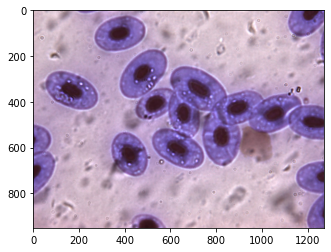

In [15]:
plt.imshow(img)

### __Task 2: Convert BGR Image you just read to grayscale using OpenCV.__
### [2.5 points]

First, let's convert Our $BGR$ image to $grayscale.$

In [22]:
### Ex-1-Task-2
gray_image = None
### BEGIN SOLUTION
# your code here
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### END SOLUTION

In [23]:
assert gray_image is not None
### INTENTIONALLY LEFT BLANK ###

## Exercise 2: Histogram
## [5 points]
In this exercise  you will:

__Task 1: Define max value and min value for 8-bit grayscale Image.__

__Task 2: Plot the histogram of grayscale Image.__

### __Task 1: Define max value and min value for 8-bit grayscale Image.__
### [2.5 points]

You have an 8-bit grayscale image. Define max_value and min_value. 

In grayscale Image pixel intensity value ranges from $0$ $to$ $2^8 = 256.$ Here we will follow this range as `min` and `max` value. 

In [24]:
### Ex-2-Task-1
max_val = None
min_val = None
### BEGIN SOLUTION
# your code here
max_val = 255
min_val = 0
### END SOLUTION

In [25]:
assert max_val is not None
assert min_val is not None
### INTENTIONALLY LEFT BLANK ###

### __Task 2: Plot the histogram of grayscale Image .__
### [2.5 points]

The given function plots histogram for a given Image `img.` You already know the max and min value of the 8-bit grayscale Image. Plot the histogram of an Image using OpenCV [calcHist()](https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html) method and see the results.

Note:
- Put argument `ranges` (pos 5) None

In [26]:
### Ex-2-Task-2
def plot_histogram(img):
    # Calculate the histogram and assign it to histr 
    histr = None
    ### BEGIN SOLUTION
    # your code here
    histSize = 256
    ranges = [0, 256]
    
    # Calculate the histogram using cv2.calcHist()
    histr = cv2.calcHist([img], [0], None, [histSize], ranges, accumulate=False)
    ### END SOLUTION
    assert histr is not None
    return histr

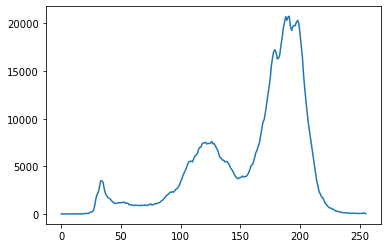

In [27]:
histogram = plot_histogram(gray_image)
plt.plot(histogram)
plt.show()

In [28]:
### INTENTIONALLY LEFT BLANK ###

## Exercise 3: Histogram equalization
## [2.5 points]
Brightness and contrast adjustments described in section $Simple~~point~~ operators$ may improve a picture's appearance, how do we automatically determine its best values? Histogram equalization is the solution.

Histogram equalization is a method in image processing of contrast adjustment using the image's histogram. In this section, You will learn to equalize the Image pixel intensity distribution using histogram equalization.

__Task 1:  Histogram equalization using OpenCV [equalizeHist(src)](https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html)__

### __Task 1:  Histogram equalization using OpenCV [equalizeHist(src)](https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html)__
### [2.5 points]

`src`: Grayscale Image

Histogram equalization is a method that improves the contrast in an image, in order to stretch out the intensity range. Apply histogram equalization in a  grayscale image.

In [29]:
### Ex-3-Task-1
equ_img = None
### BEGIN SOLUTION
# your code here
equ_img = cv2.equalizeHist(gray_image)
### END SOLUTION

In [30]:
assert equ_img is not None
### INTENTIONALLY LEFT BLANK ###

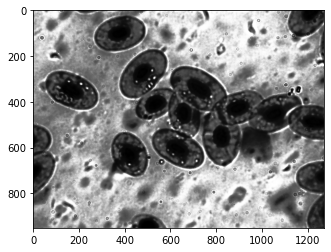

In [31]:
plt.imshow(equ_img,cmap='gray')

Let's Plot the histogram of equalized Image just to see the results.

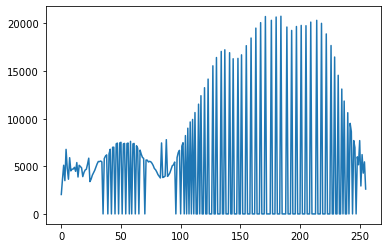

In [32]:
histogram = plot_histogram(equ_img)
plt.plot(histogram)
plt.show()

## Exercise 4: Thresholding Techniques
## [3.5 points]

Thresholding is used to segment images, mostly in the foreground and background. Our cell.PNG Image contains Red Blood Cell [Histology](https://en.wikipedia.org/wiki/Histology). In this assignment section, we will use different thresholding techniques with this Image to see the histology of red blood cells.

As you already know, OTSU finds the optimal value of the global threshold. First, we will find the optimal value of the threshold and apply different global thresholding technique.

__Task 1: Find the value of the optimal threshold using OTSU and Image after applying an optimal threshold.__

__Task 2:Use value of optimal threshold as a global threshold and apply different global thresholding techniques.__ 

The grayscale image is blurred using a box filter. You will learn about the box filter on upcoming chapters. For now, let's blur the picture.

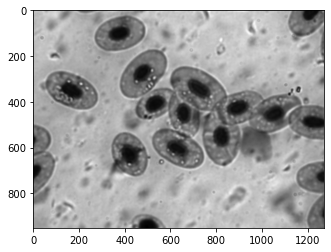

In [33]:
blured_gray_image = cv2.blur(gray_image,(7,7),0)
plt.imshow(blured_gray_image,cmap='gray')

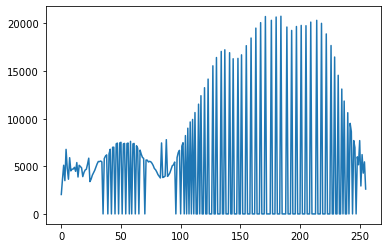

In [34]:
medianhist = plot_histogram(blured_gray_image)
plt.plot(histogram)
plt.show()

### __Task 1: Find the value of the optimal threshold using OTSU and Image after applying an optimal threshold.__
### [2.5 points]

If you ignore the peak around point 40, the Image Histogram of grayscale Image is bimodal. You can use optimal thresholding(OTSU) to identify the threshold's value to segment the Image. For now, you want only cell Image and remove everything outside the cell that is the background. 

In Task 1, you will:

- Find the value of the optimal threshold and the Image after applying an optimal threshold
    - To find the value of the optimal threshold and the Image after applying the optimal threshold, Use THRESH_TRUNC + THRESH_OTSU.
   
Note: 

- Use blured_gray_image.

In [38]:
### Ex-4-Task-1
optimal_threshold = None
image_after_optimal_threshold = None
### BEGIN SOLUTION
# your code here
optimal_threshold, image_after_optimal_threshold = cv2.threshold(blured_gray_image, 0, 255, cv2.THRESH_TRUNC + cv2.THRESH_OTSU)

### END SOLUTION

In [39]:
assert optimal_threshold is not None
assert image_after_optimal_threshold is not None
### INTENTIONALLY LEFT BLANK ###

Congratulations, you have successfully found the value of the global threshold and image after applying the optimal threshold. Let's Plot the Blurred Image along with its histogram and the segmented image you have created using OTSU thresholding.

146.0


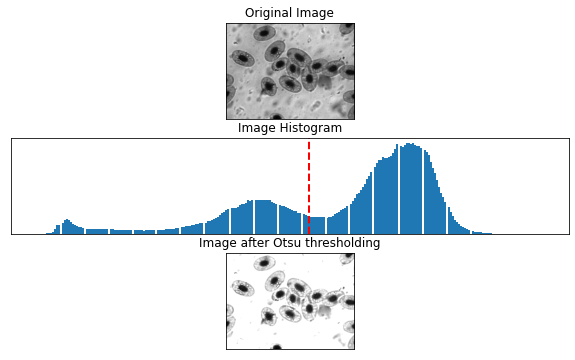

In [40]:
plt.figure(figsize=(10,6))
plt.subplot(3,1,1), plt.imshow(blured_gray_image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,2), plt.hist(blured_gray_image.ravel(), 255)
plt.axvline(x=optimal_threshold, color='r', linestyle='dashed', linewidth=2)
plt.title('Image Histogram'), plt.xticks([]), plt.yticks([])
print(optimal_threshold)
plt.subplot(3,1,3), plt.imshow(image_after_optimal_threshold,cmap = 'gray')
plt.title('Image after Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

### __Task 2: Use a value of optimal threshold as the global threshold and apply different global thresholding techniques.__
### [1 point]
The OTSU thresholding already calculated the optimal value of the global threshold. Let's use the calculated value of otsu thresholding as a global threshold and see the different types of global threshold methods.

In [42]:
global_thres = optimal_threshold

Apply five types of binary threshold on the median blurred Image.

In [49]:
### Ex-4-Task-2

# thresholded Image
THRESH_BINARY = None
THRESH_BINARY_INV = None
THRESH_TRUNC  = None
THRESH_TOZERO  = None
THRESH_TOZERO_INV   = None
# Value of threshold
th_bin = None
th_bin_inv = None
th_trunc = None
th_zero = None
th_zero_inv = None

### BEGIN SOLUTION
# your code here

ret, th_bin = cv2.threshold(blured_gray_image, global_thres, 255, cv2.THRESH_BINARY)


ret, th_bin_inv = cv2.threshold(blured_gray_image, global_thres, 255, cv2.THRESH_BINARY_INV)


ret, th_trunc = cv2.threshold(blured_gray_image, global_thres, 255, cv2.THRESH_TRUNC)


ret, th_zero = cv2.threshold(blured_gray_image, global_thres, 255, cv2.THRESH_TOZERO)


ret, th_zero_inv = cv2.threshold(blured_gray_image, global_thres, 255, cv2.THRESH_TOZERO_INV)

# assign values
THRESH_BINARY = th_bin
THRESH_BINARY_INV = th_bin_inv
THRESH_TRUNC  = th_trunc
THRESH_TOZERO  = th_zero
THRESH_TOZERO_INV   = th_zero_inv
### END SOLUTION

In [50]:
assert THRESH_BINARY is not None
assert th_bin is not None
assert THRESH_BINARY_INV is not None
assert th_bin_inv is not None
assert THRESH_TRUNC is not None
assert th_trunc is not None
assert THRESH_TOZERO is not None
assert th_zero is not None
assert THRESH_TOZERO_INV is not None
assert th_zero_inv is not None


In [51]:
titles = ['Original Image','THRESH_BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV'] 
images = [blured_gray_image, THRESH_BINARY, THRESH_BINARY_INV, THRESH_TRUNC, THRESH_TOZERO, THRESH_TOZERO_INV] 

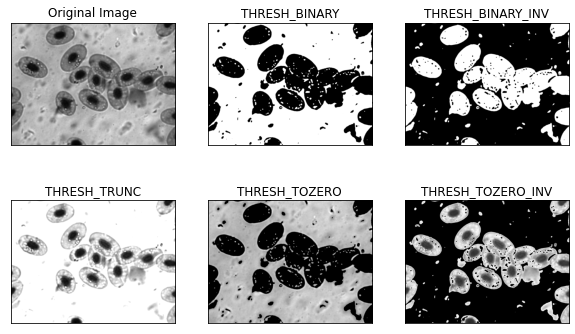

In [52]:
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray') # plot images in list
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Optional

This is the Implementation of an adaptive threshold. You can change the value of blocksize and C to tune the output of the segmented image. Click [here](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=adaptivethreshold) for more details.

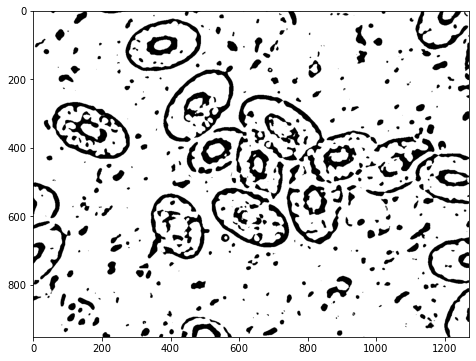

In [47]:
adaptive_thres = cv2.adaptiveThreshold(blured_gray_image,max_val,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,35,11)
plt.figure(figsize=(10,6))
plt.imshow(adaptive_thres,cmap='gray')

# The End

In [48]:
stop = timeit.default_timer()
execution_time = stop - start
print("Program Executed in {} Seconds.".format(execution_time)) # It returns time in seconds

Program Executed in 1562.701570291 Seconds.
